In [10]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

This is an script to analyze the output of experiment 1. In this experiment the CMD was trained with increasing subsets of the original set of 300K molecules used in the CMD paper. The idea is to figure out how the size of the training set influences the correctness, diversity and novelty of the output generated with the CMD. 
The correctness of the training and output files is assessed by the percentage of correct SMILES.
The diversity of the training and output files are assessed by counting the number of clusters, frames and generic frames in both sets. 
The novelty of the training set is assessed by the percentage of molecules with a Tanimoto similarity < 0.7 to any molecule in the training set, and the percentage of frames or generic frames not present in the training set. 
In this version we analyze the outputs generated when the CMD was set to output 10K molecules instead of 5K. 

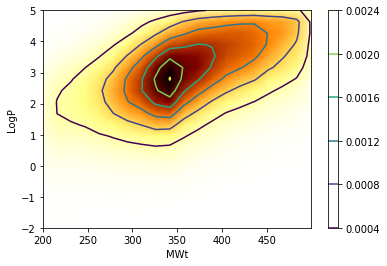

In [2]:
##########################################################
## Analysis of the unconditioned output
##########################################################

# Init the time counter for the whole notebook
start = time.time()


# 2D plot of MW vs logP of training set
data_uri='../data/ZINC_310k.csv'
Y = pd.read_csv(data_uri)
Y = Y[["MolWt", "LogP"]]
mf.bidiplot(np.asarray(Y), "MWt","LogP", d = True)

In [3]:
it = range(50000, 300001, 50000)

df_un, cls_un = mf.wholean(it = it, name_train = "train", name_pref = "unc2-")

Clustering time: 00:00:07
Diversity analysis time: 00:02:35
Clustering time: 00:00:01
Diversity analysis time: 00:00:26
Arenas creation time: 00:00:00
Novelty analysis time: 00:03:00
Clustering time: 00:00:18
Diversity analysis time: 00:04:52
Clustering time: 00:00:01
Diversity analysis time: 00:00:28
Arenas creation time: 00:00:00
Novelty analysis time: 00:05:48
Clustering time: 00:00:37
Diversity analysis time: 00:07:32
Clustering time: 00:00:00
Diversity analysis time: 00:00:25
Arenas creation time: 00:00:00
Novelty analysis time: 00:08:57
Clustering time: 00:01:01
Diversity analysis time: 00:10:50
Clustering time: 00:00:00
Diversity analysis time: 00:00:29
Arenas creation time: 00:00:00
Novelty analysis time: 00:10:49
Clustering time: 00:01:25
Diversity analysis time: 00:13:33
Clustering time: 00:00:00
Diversity analysis time: 00:00:26
Arenas creation time: 00:00:00
Novelty analysis time: 00:14:33
Clustering time: 00:01:56
Diversity analysis time: 00:16:10
Clustering time: 00:00:00

In [4]:
# Show the results in the output dataframe

df_un

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,41799.0,35450.0,48902.0,10000.0,96.65,5493.0,4484.0,7459.0,34.52,65.59,88.64
2,100000.0,100.0,77318.0,64749.0,95904.0,10000.0,97.93,4780.0,4123.0,6955.0,24.09,62.94,85.71
3,150000.0,100.0,109302.0,91220.0,141614.0,10000.0,93.88,6584.0,5451.0,7966.0,29.89,54.65,75.61
4,200000.0,100.0,139146.0,115765.0,186034.0,10000.0,94.69,6080.0,5307.0,7741.0,26.30,57.06,77.57
5,250000.0,100.0,167503.0,139207.0,229387.0,10000.0,95.06,6367.0,5295.0,7830.0,24.23,51.50,73.79
6,300000.0,100.0,194526.0,161518.0,271997.0,10000.0,96.08,5929.0,4857.0,7437.0,21.91,50.67,72.95


In [5]:
# Save the results

df_un.to_csv("analysis1-un-10000.csv")

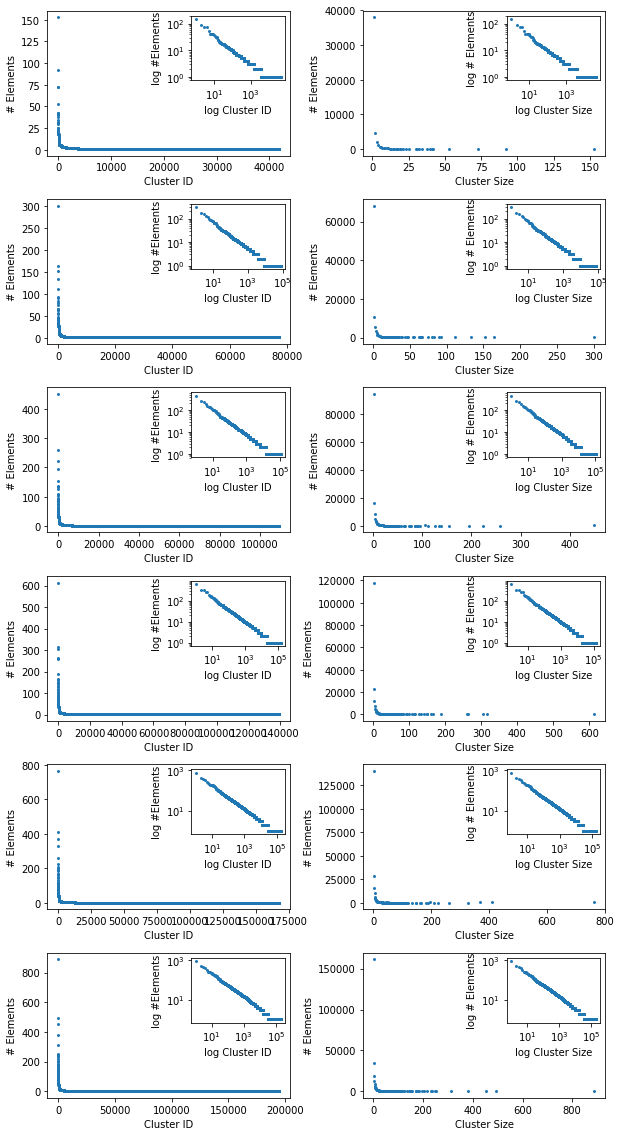

In [6]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un, 10, 20)

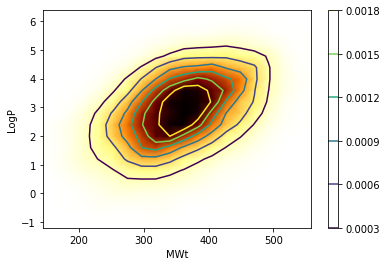

In [11]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./unc2-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)

In [12]:
it = range(50000, 300001, 50000)

In [13]:
##########################################################
## Analysis of the conditioned output
##########################################################

df_co, cls_co = mf.wholean(it = it, name_train = "train", name_pref = "con2-")

Clustering time: 00:00:06
Diversity analysis time: 00:02:41
Clustering time: 00:00:01
Diversity analysis time: 00:00:23
Arenas creation time: 00:00:00
Novelty analysis time: 00:02:59
Clustering time: 00:00:20
Diversity analysis time: 00:05:17
Clustering time: 00:00:01
Diversity analysis time: 00:00:23
Arenas creation time: 00:00:00
Novelty analysis time: 00:05:26
Clustering time: 00:00:37
Diversity analysis time: 00:08:15
Clustering time: 00:00:01
Diversity analysis time: 00:00:21
Arenas creation time: 00:00:00
Novelty analysis time: 00:07:36
Clustering time: 00:00:58
Diversity analysis time: 00:11:01
Clustering time: 00:00:00
Diversity analysis time: 00:00:22
Arenas creation time: 00:00:00
Novelty analysis time: 00:06:41
Clustering time: 00:01:02
Diversity analysis time: 00:09:22
Clustering time: 00:00:01
Diversity analysis time: 00:00:14
Arenas creation time: 00:00:00
Novelty analysis time: 00:08:22
Clustering time: 00:01:23
Diversity analysis time: 00:11:01
Clustering time: 00:00:00

In [14]:
# Show the results dataframe

df_co

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,41799.0,35450.0,48902.0,10000.0,97.83,3175.0,1773.0,3057.0,53.42,61.53,83.58
2,100000.0,100.0,77318.0,64749.0,95904.0,10000.0,98.40,2791.0,1557.0,2641.0,40.57,52.73,71.49
3,150000.0,100.0,109302.0,91220.0,141614.0,10000.0,96.29,4153.0,2483.0,3848.0,44.79,53.60,65.98
4,200000.0,100.0,139146.0,115765.0,186034.0,10000.0,96.91,3671.0,2231.0,3454.0,36.81,49.66,62.45
5,250000.0,100.0,167503.0,139207.0,229387.0,10000.0,96.38,3831.0,2226.0,3548.0,36.90,46.59,58.88
6,300000.0,100.0,194526.0,161518.0,271997.0,10000.0,96.58,3106.0,1772.0,2883.0,35.02,43.74,54.77


In [15]:
# Save the results dataframe

df_co.to_csv("analysis1-co-10000.csv")

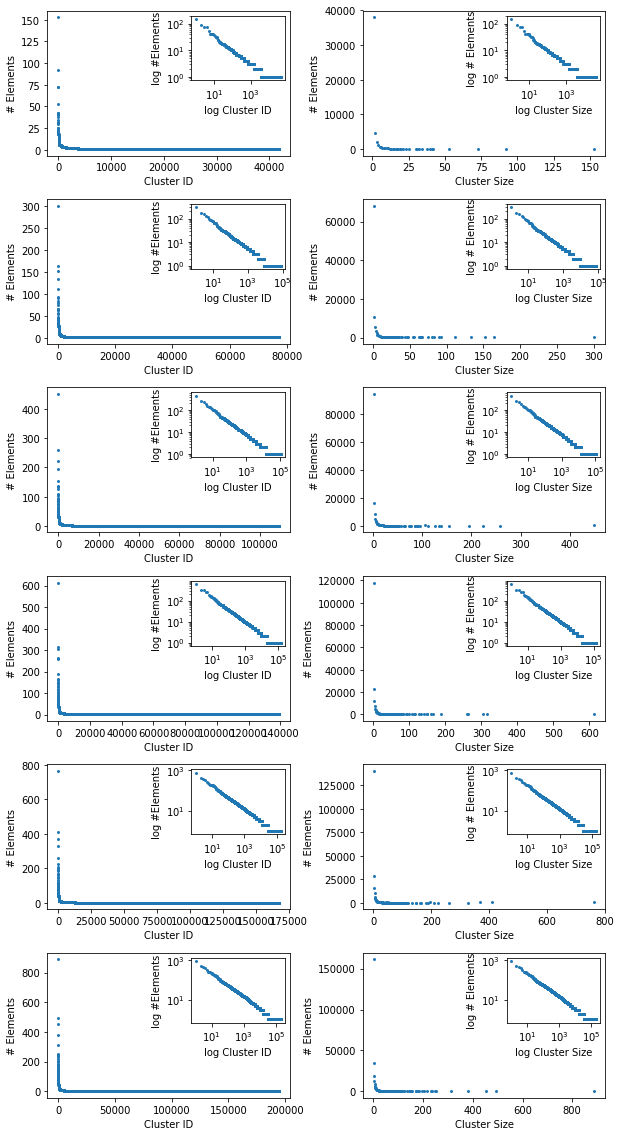

In [16]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co, 10, 20)

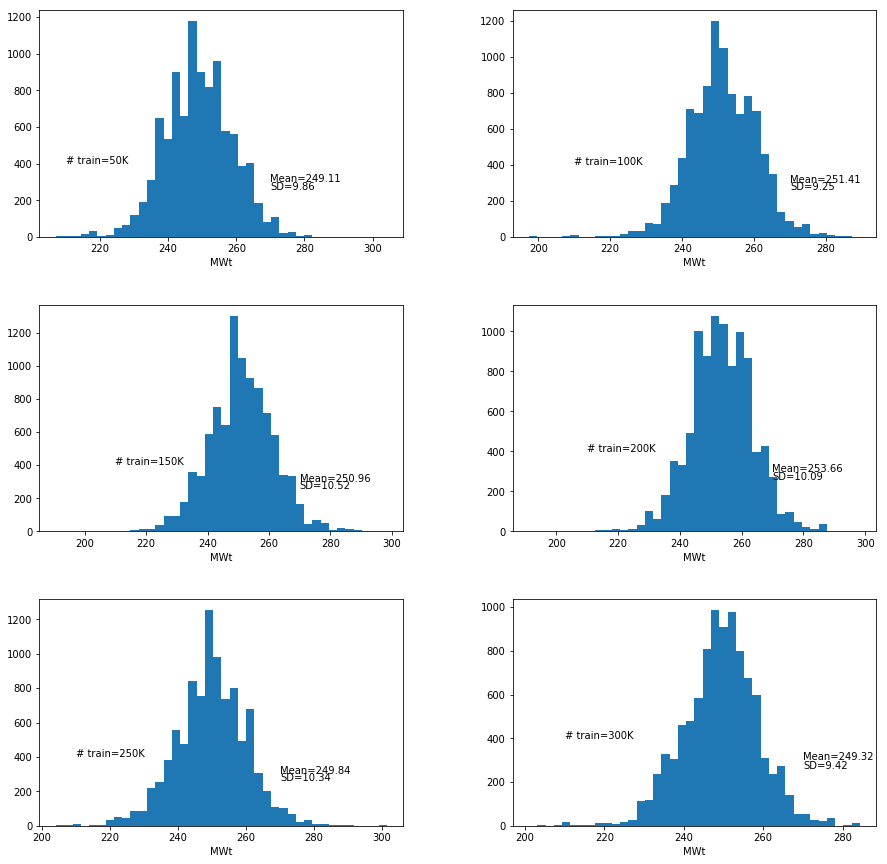

In [17]:
### Plot the bunch of histograms of mwt
it = range(50000, 300001, 50000)
mwts = []

for n in it:
    smis = mf.smif2smis('./con2-' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

leg = ["# train=50K","# train=100K","# train=150K","# train=200K","# train=250K","# train=300K"] 

mf.paintmultihist(mwts, "MWt", 3, 2, 270, 300, 15, 15, 210, 400, leg)

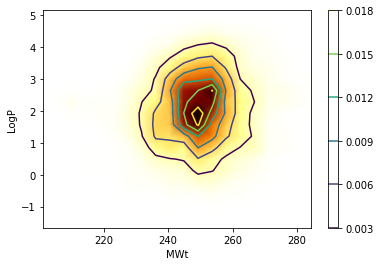

In [18]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./con2-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)

In [19]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp1Analysis10000 execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))
    

Exp1Analysis10000 execution time: 05:38:10


In [20]:
import dill
dill.dump_session("Exp1Analysis10000.db")